# 蒙特卡罗算法
---

[蒙特卡罗方法](https://zh.wikipedia.org/wiki/蒙地卡羅方法)（Monte Carlo method），也称统计模拟方法，是一种以概率统计理论为指导的数值计算方法。它使用随机数（或更常见的伪随机数）来解决科学和工程中的很多计算问题。 

通常蒙特卡罗方法可以粗略地分成两类：

1. 一类是所求解的问题本身具有内在的随机性，借助计算机的运算能力可以直接模拟这种随机的过程。例如模拟核裂变过程。
2. 另一种类型是所求解问题可以转化为某种随机分布的特征数，比如随机事件出现的概率，或者随机变量的期望值。通过随机抽样的方法，以随机事件出现的频率估计其概率，或者以抽样的数字特征估算随机变量的数字特征，并将其作为问题的解。例如求解复杂的多维积分问题。

**示例** 使用蒙特卡罗方法估算$\pi$值

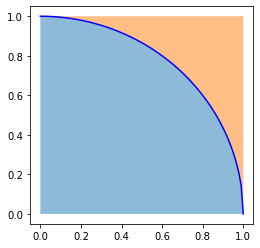

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))
x = np.linspace(0,1,100)
y = np.sqrt(1 - x**2)
ax.plot(x, y, c='b')
ax.fill_between(x, 0, y, alpha=0.5)
ax.fill_between(x, y, 1, alpha=0.5)

In [2]:
from ipywidgets import interactive

np.random.seed(0)

def pi(n):
    N = 10**n
    x = np.random.random(N)
    y = np.random.random(N)
    dist = x**2 + y**2
    pi = np.sum(dist < 1) / N * 4
    X = np.linspace(0,1,100)
    Y = np.sqrt(1 - X**2)
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.plot(X, Y, c='b')
    ax.scatter(x, y, s=1, alpha=0.5)
    plt.show()
    print('Number of Data Point  %d' %(N))
    print('Estimate Value of Pi  %f' %(pi))

interact_plot = interactive(pi, n=(1, 7))
interact_plot

interactive(children=(IntSlider(value=4, description='n', max=7, min=1), Output()), _dom_classes=('widget-inte…

## 伪随机数生成器（PRNG）
---

经典计算机的数据都是由确定性算法生成的，因此随机数生成算法只能得到伪随机数序列。虽然伪随机数并不真正的随机，但具有类似于随机数的统计特征，如均匀性、独立性等。真正的随机数必须使用专门的设备，比如热噪信号、用户按键盘的位置与速度、移动设备加速度传感器等，或者使用量子计算机。

密码学中使用伪随机数要小心，其可计算性是一个可以攻击的地方。统计学、蒙特卡罗方法上使用的伪随机数也必须挑选周期极长、随机性够高的随机函数，以确保计算结果有足够的随机性。 

### 线性同余发生器（LCG）

[线性同余发生器](https://zh.wikipedia.org/wiki/線性同餘方法)是一种能产生具有不连续计算的**均匀分布**伪随机序列的分段线性方程的算法。它的递推公式是：
$$N_{{j+1}}\equiv (A\times N_{j}+B){\pmod  {M}}$$
其中参数为乘数$A$、增量$B$和模数$M$。

Hull-Dobell定理：当且仅当满足以下条件时，LCG序列的周期最大（最大周期为M）：

1. $B$和$M$互质
2. $A-1$可以被$M$的所有质因数整除
3. 如果$M$是4的倍数，则$A-1$也需要是4的倍数

序列的初始值$N_0$被称为*种子*。LCG算法通常被设计为返回$z/m$，即[0, 1]区间的浮点数。

In [3]:
def lcg(m=2**32, a=1103515245, b=12345):
    lcg.current = (a*lcg.current + b) % m
    return lcg.current/m

# setting the seed
lcg.current = 1

[lcg() for i in range(10)]

[0.25693503906950355,
 0.5878706516232342,
 0.15432575810700655,
 0.767266943352297,
 0.9738139626570046,
 0.5858681506942958,
 0.8511155843734741,
 0.6132153405342251,
 0.7473867232911289,
 0.06236015981994569]

### 逆变换采样

[逆变换采样](https://zh.m.wikipedia.org/zh-hans/逆变换采样)是伪随机数采样的一种基本方法。在已知**任意概率分布**的累积分布函数时，可用于从该分布中生成随机样本。 

In [4]:
def expon_pdf(x, lmabd=1):
    """指数分布的概率密度函数"""
    return lmabd*np.exp(-lmabd*x)

In [5]:
def expon_cdf(x, lambd=1):
    """指数分布的累积分布函数"""
    return 1 - np.exp(-lambd*x)

In [6]:
def expon_icdf(p, lambd=1):
    """指数分布的累积分布函数逆函数，即分位函数"""
    return -np.log(1-p)/lambd

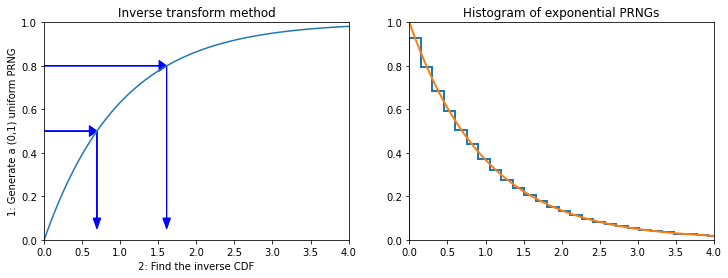

In [7]:
import scipy.stats as stats

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(x, expon_cdf(x))
plt.axis([0, 4, 0, 1])
for q in [0.5, 0.8]:
    plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
    plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
plt.ylabel('1: Generate a (0,1) uniform PRNG')
plt.xlabel('2: Find the inverse CDF')
plt.title('Inverse transform method');

plt.subplot(122)
np.random.seed(0)
N = 10**6
u = np.random.random(N)
v = expon_icdf(u)
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
plt.plot(x, expon_pdf(x), linewidth=2)
plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs');

### Python中的随机数生成器

`numpy.random`和`scipy.stats`中提供的随机数生成函数都是基于[梅森旋转](https://zh.wikipedia.org/wiki/梅森旋转算法)（Mersenne Twister）演算法，可以快速产生高质量的伪随机数。SciPy中还提供了有关概率密度函数（PDF）和累积分布函数（CDF）相关的工具。

In [8]:
# Using scipy
import scipy.stats as ss

n = 5
xs = [0.1, 0.5, 0.9]
rv = ss.beta(a=0.5, b=0.5)

print(rv.pdf(xs))
print(rv.cdf(xs))
print(rv.ppf(xs))  # ppf是cdf的反函数，即分位函数
print(rv.rvs(n))   # 随机变量

[1.06103295 0.63661977 1.06103295]
[0.20483276 0.5        0.79516724]
[0.02447174 0.5        0.97552826]
[0.95231484 0.90344357 0.99853595 0.50979041 0.02821506]


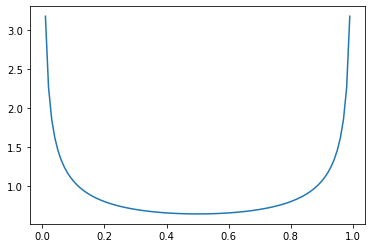

In [9]:
# And here is a plot of the PDF for the beta distribution
xs = np.linspace(0, 1, 100)
plt.plot(xs, ss.beta.pdf(xs, a=0.5, b=0.5))

## 蒙特卡罗积分
---

假设我们需要进行如下积分：

$$I = \int_a^b f(x) dx$$

积分体积为$V$。蒙特卡罗积分通过计算落在$f(x)$中随机分布点的比例与$V$的乘积来估计积分值的近似值。

从统计学角度出发，我们将上式改写为：

$$I = \int_X \frac{f(x)}{p(x)}p(x)dx = \int_X h(x)p(x)dx = E[h(X)]$$

计算积分等价于找到$h(X)=\frac{f(x)}{p(x)}$的数学期望值。对于一维单变量问题，$p(x)=1/(b-a)$。

我们可以使用$n$次随机采样，对该期望值进行估计，

$$E[h(X)] \approx \bar{h_n} = \frac{1}{n} \sum_{i=1}^n h(x_i) $$

我们可以对蒙特卡罗方法的方差进行估计，

$$v_n = \frac{1}{n^2} \sum_{o=1}^n (h(x_i) - \bar{h_n})^2)$$

根据[中心极限定理](https://zh.wikipedia.org/wiki/中心极限定理)，

$$\frac{\bar{h_n} - E[h(X)]}{\sqrt{v_n}} \sim \mathcal{N}(0, 1)$$

可知蒙特卡罗积分的收敛速度是$\mathcal{0}(n^{1/2})$，且与维度无关。因此，相对于数值积分（收敛速度是$\mathcal{0}(n^{d})$），蒙特卡罗积分在处理高维问题时更为有效。

### 有限积分

我们使用蒙特卡罗积分对$\int_0^1 e^x dx$进行估计。函数$e^x$的取值范围为0到$e$。

(0.0, 2.718281828459045)

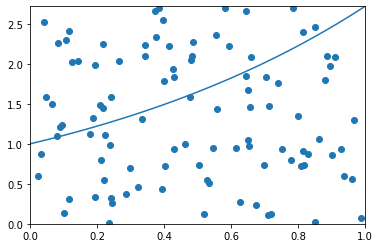

In [10]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0,1])
plt.ylim([0, np.e])

In [11]:
# Check analytic solution
from sympy import symbols, integrate, exp

x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()

1.71828182845905

In [12]:
# Using numerical quadrature

from scipy import integrate
integrate.quad(exp, 0, 1)

(1.7182818284590453, 1.9076760487502457e-14)

In [13]:
# Monte Carlo approximation
for n in 10**np.array([1,2,3,4,5,6]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n
    print('%10d %.6f' % (n, sol))

        10 1.630969
       100 1.685335
      1000 1.739700
     10000 1.701101
    100000 1.718770
   1000000 1.718607


**大数定律** 样本数量越多，则其算术平均值就有越高的概率接近期望值。[大数定律](https://zh.wikipedia.org/wiki/大數法則)说明了一些随机事件的均值的长期稳定性，即偶然之中包含着必然。

### 方差估计

蒙特卡罗积分的结果是否收敛对于结果的准确性非常重要。因此，我们需要对方差进行估计。一个获取结果置信区间的简单方法是重复进行多次蒙特卡罗模拟。

In [14]:
n = 10**6
sol = []

for i in range(10):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 
    sol.append((volume * count)/n)

np.percentile(sol, [2.5, 50, 97.5])

array([1.71703418, 1.71904822, 1.72091935])

### 方差缩减

蒙特卡罗积分的期望误差与$\sqrt n$成反比，精度可以通过增加模拟的次数，但是速度较慢。提高计算精度更有效的途径是减小方差。常见的方差缩减技术有分层抽样法、重要性抽样法、条件期望法、对偶变量法、控制变量法、准随机数等。

**重要性抽样**

使用常规蒙特卡罗方法计算标准正态分布的尾部几率$P(X > 5)$是非常困难的。因为$10^7$个随机采样中，只有平均3个采样大于5。

In [15]:
n = 10**6
y = ss.norm().rvs(n)
h_mc = 1.0/n * np.sum(y > 5)
print(h_mc)

0.0


我们可以引入另外一个分布函数$g(x)$做为重要性函数，使有限的采样更合理地分配在每个区间。蒙特卡罗积分地表达式改写为：

$$E_f[h(x)] \ = \  \int_X h(x) \frac{f(x)}{g(x)} g(x) dx \ = \ E_g\left[ \frac{h(X) f(X)}{g(X)} \right]$$

新的期望值为

$$E[h(X)] \approx \bar{h_n} = \frac{1}{n} \sum_{i=1}^n \frac{f(x_i)}{g(x_i)} h(x_i) $$

其中$f(x_i)/g(x_i)$标识出了样本$h(x_i)$在估计$\bar{h_n}$中重要性。

In [16]:
n = 10**4
y = ss.expon(loc=5).rvs(n)
h_is = 1.0/n * np.sum(ss.norm().pdf(y)/ss.expon(loc=5).pdf(y))
print(h_is)

2.93019354069629e-07


**准随机数**

准随机数发生器（QRNG）可以产生高度均匀的单位超立方体样本。与普通伪随机数不同，准随机序列寻求均匀填充空间。在统计意义上，准随机数过于均匀，不能通过传统的随机性测试。

在蒙特卡罗积分中使用准随机序列以减小方差的思路与分层抽样法类似，二者的目的都是让随机样本更均匀地分布在空间中。

### 无穷积分

蒙特卡罗积分可以计算与分布函数相关的无穷积分，例如下式：

$$\int_{-\infty}^{\infty} x^2 \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2}) dx$$

我们取$f(x) = x^2$，则剩余部分$p(x)= \frac{1}{\sqrt{2\pi}} \exp(\frac{-x^2}{2})$是标准正态分布的密度函数。上述积分等价于计算函数$f(x)$在标准正态分布下的均值。

因此，我们可以按照标准正态分布在区间$(-\infty, \infty)$进行抽样，然后计算函数均值作为上述无穷积分的估计值。

In [17]:
def f(x):
    return x**2

n = 10**5
pts = np.random.randn(n)
np.mean(f(pts))

1.00034565170873

In [18]:
# Check analytic solution
from sympy import symbols, integrate, exp, sqrt, pi, oo

x = symbols('x')
expr = integrate( x**2 / sqrt(2*pi) * exp(-x**2/2), (x, -oo, oo))
expr.evalf()

1.00000000000000

### 多重积分

当增加积分变量时，数值方法计算多重积分的计算量（正比于$n^d$）快速增长。

In [19]:
def f(*args):
    return  np.exp(-np.sum(np.array(args)**2))

from scipy import integrate

%time print(integrate.nquad(f, [(0,1)] * 1))
%time print(integrate.nquad(f, [(0,1)] * 2))
%time print(integrate.nquad(f, [(0,1)] * 3))
%time print(integrate.nquad(f, [(0,1)] * 4))

(0.7468241328124271, 8.291413475940725e-15)
CPU times: user 0 ns, sys: 722 µs, total: 722 µs
Wall time: 614 µs
(0.5577462853510337, 8.291374381535408e-15)
CPU times: user 4.27 ms, sys: 34 µs, total: 4.31 ms
Wall time: 4.37 ms
(0.4165383858866382, 8.291335287314424e-15)
CPU times: user 84.8 ms, sys: 1.02 ms, total: 85.8 ms
Wall time: 85.6 ms
(0.31108091882287664, 8.291296193277774e-15)
CPU times: user 1.7 s, sys: 2.54 ms, total: 1.7 s
Wall time: 1.71 s


蒙特卡罗积分的精度较低，但是在维度上的拓展性非常好。

In [20]:
def mc(n, d):
    pts = np.random.uniform(0, 1, (n, d))
    sum = 0
    for i in pts:
        sum += f(i)
    return sum/len(pts)

n = 10**4

%time print(mc(n, 1))
%time print(mc(n, 2))
%time print(mc(n, 3))
%time print(mc(n, 4))

7.480948522377715e-01
CPU times: user 116 ms, sys: 42.7 ms, total: 158 ms
Wall time: 122 ms
5.575226273257917e-01
CPU times: user 96.2 ms, sys: 14.3 ms, total: 110 ms
Wall time: 98.7 ms
4.149940924463084e-01
CPU times: user 90.7 ms, sys: 0 ns, total: 90.7 ms
Wall time: 90.7 ms
3.1206561068717004e-01
CPU times: user 129 ms, sys: 40.9 ms, total: 170 ms
Wall time: 128 ms


## 蒙特卡罗数值优化
---

### 模拟退火算法

[模拟退火](https://zh.wikipedia.org/wiki/模拟退火)算法来源于材料科学中的退火过程。当固体温度增加时，内部原子运动速度增加，固体内原子构型发生改变；当其缓慢冷却时，内部原子构型趋向有序，且内能（原子间相互作用能）减小。可以将系统内能写为原子坐标的函数$E(X_1, X_2,...,X_n)$，在退火后新的平衡位置上，$E$为局部或全局极小值。

在退火模拟中，每一步会随机生成一个新的原子构型。根据[Metropolis抽样](https://zh.m.wikipedia.org/zh-hans/梅特罗波利斯－黑斯廷斯算法)准则，新构型的接受概率为：
$$P(acc)=min(1,e^{-{\frac {\Delta U}{k_{B}T}}})$$
其中$\Delta U$为内能改变量，$k_{B}$为玻尔兹曼常数，$T$为温度。$k_{B}T$正比于原子的平均动能。

优化问题的模拟退火算法和材料热退火过程有诸多相似之处。

| 模拟退火 | 物理退火 | 
|---|---|
| 变量 | 粒子状态 |
| 目标函数 | 能量 |
| 最优解 | 能量最低态 |
| 设定动能（控制参数） | 材料熔解 |
| Metropolis采样 | 等温过程 |
| 控制参数下降 | 材料冷却 |

模拟退火算法也常用于机器学习，特别是强化学习的算法中。一般情况下，针对得到的样本数据集创建相对模糊的模型，通过蒙特卡洛方法对于模型中的参数进行选取，使之于原始数据的残差尽可能的小。从而达到创建模型拟合样本的目的。 

### 函数优化

使用蒙特卡罗模拟退火算法进行函数优化是按照以下步骤进行的：

1. 使用随机数生成器在变量空间中产生一个随机的位置坐标。
2. 对此位置做无规则的改变，产生一个新的位置坐标。
3. 计算新的位置坐标处的函数值。
4. 比较新的位置坐标与改变前的位置坐标的函数值变化，判断是否接受该坐标。
    * 若新的位置坐标函数值低于原位置坐标的函数值，则接受新的坐标，使用这个坐标重复再做下一次迭代。
    * 若新的位置坐标函数值高于原位置坐标的函数值，则计算玻尔兹曼因子，并产生一个随机数。
         * 若这个随机数大于所计算出的玻尔兹曼因子，则放弃这个坐标，重新计算。
         * 若这个随机数小于所计算出的玻尔兹曼因子，则接受这个坐标，使用这个坐标重复再做下一次迭代。
5. 如此进行迭代计算，直至最后搜索出低于所给函数值条件的位置坐标结束。

In [21]:
import numpy as np

x = np.linspace(-1, 1, 200)
y = np.linspace(-1, 1, 200)
z = np.linspace(-1, 1, 200)
Y, Z, X = np.meshgrid(x, y, z)

def gaussian(x0, y0, z0):
    return np.exp(-(X - x0)**2 - (Y - y0)**2 - (Z - z0)**2)

# 局部极小值在(-0.5, -0.5, -0.5)附近，全局极小值在(0.5, 0.5, 0.5)附近
data = gaussian(0.1, -0.1, -0.1) - gaussian(-0.5, -0.5, -0.5) - gaussian(0.5, 0.5, 0.5) * 2

np.unravel_index(np.argmin(data), data.shape), np.min(data)

((158, 159, 155), -1.6786677651535498)

In [22]:
def annealing(pos, step, KbT):
    for i in range(step):
        value = data[tuple(pos)]
        new_pos = pos + np.round(np.random.random(3)) * 2 - 1
        new_pos = np.int32(new_pos % 200)
        new_value = data[tuple(new_pos)]
        if new_value < value:
            pos = new_pos
            value = new_value
        else:
            delta = new_value - value
            p = np.exp(-delta/KbT)
            if p > np.random.random():
                pos = new_pos
                value = new_value
    return pos, value


step = 10**5
KbT = 0.01

#np.random.seed(0)

pos1 = [50, 50, 50]  # 局部极小值附近
print(annealing(pos1, step, KbT))

pos1 = [150, 150, 150]  # 全局极小值附近
print(annealing(pos1, step, KbT))

(array([42, 28, 18], dtype=int32), -6.47500263593602e-01)
(array([166, 148, 144], dtype=int32), -1.6298332830008784e+00)


可以看到，在温度/动能较低时，蒙特卡罗模拟不能保证系统在有限的时间内收敛到最低点。增加模拟时间或者增加温度，可以增大系统从局部势阱约束中逃逸的几率。

In [23]:
'''变温'''
KbT = 0.1
pos = np.int32(np.random.random(3)*200)

for i in range(5):
    pos, value = annealing(pos, step, KbT / 10**i)
    print(pos, value)

[150 158 158] -1.663716471535144e+00
[159 163 155] -1.6748256186617998e+00
[159 159 153] -1.6781104938081959e+00
[158 158 154] -1.6785044514327343e+00
[159 159 155] -1.6786525249704818e+00


1. 相对于数值算法只能收敛到局部最优解，模拟退火算法所得解依概率收敛到全局最优解。
2. 模拟退火算法对变量数目不敏感，可以很轻松处理高维问题。